In [3]:
print("""
Scatter plot of Playlist Reach vs. Playlist Count, weighted by streams (potential audience size vs number of playlists the song is in).
goal is to convert free tier users to paid ones by offering premium playlist recommendations
""")



Scatter plot of Playlist Reach vs. Playlist Count, weighted by streams (potential audience size vs number of playlists the song is in).
goal is to convert free tier users to paid ones by offering premium playlist recommendations



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plot_settings
from plot_settings import colors 

In [5]:
dfs = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')
dfs.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [16]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [6]:
# Much of the data are 'object' when they should be 'int'
dfs['Spotify Streams'] = dfs['Spotify Streams'].str.replace(',', '').astype(float)
dfs['Spotify Playlist Count'] = dfs['Spotify Playlist Count'].str.replace(',', '').astype(float)
dfs['Spotify Playlist Reach'] = dfs['Spotify Playlist Reach'].str.replace(',', '').astype(float)

In [7]:
# Drop all data points that are 'NaN'.
dfs1 = dfs.dropna(subset=['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach'])

In [8]:
#I want to maintain the name dfs 
dfs = dfs1

In [9]:
x = dfs['Spotify Playlist Count']
y = dfs['Spotify Playlist Reach']

r = np.corrcoef(x,y)[1][0]
a = r*(y.std()/x.std())
b = y.mean() - (a*x.mean())

x_lin = np.linspace(min(x), max(x), 10)
y_lin = a*x_lin + b

In [10]:
np.corrcoef(x,y)

array([[1.        , 0.60768182],
       [0.60768182, 1.        ]])

In [11]:
# 0.5 < r < 0.7 indicates a moderate correlation between playlist count and reach.


In [12]:
# Playlist count vs reach by weighing in streams

quantiles = dfs['Spotify Streams'].quantile([0.25, 0.75])
q_low = quantiles[0.25]
q_high = quantiles[0.75]

group1 = dfs[dfs['Spotify Streams'] <= q_low]
group2 = dfs[(dfs['Spotify Streams'] > q_low) & (dfs['Spotify Streams'] <= q_high)]
group3 = dfs[dfs['Spotify Streams'] > q_high]

In [13]:
x1 = group1['Spotify Playlist Count']
y1 = group1['Spotify Playlist Reach']
x2 = group2['Spotify Playlist Count']
y2 = group2['Spotify Playlist Reach']
x3 = group3['Spotify Playlist Count']
y3 = group3['Spotify Playlist Reach']

r1 = np.corrcoef(x1,y1)[1][0]
a1 = r1*(y1.std()/x1.std())
b1 = y1.mean() - (a1*x1.mean())

r2 = np.corrcoef(x2,y2)[1][0]
a2 = r2*(y2.std()/x2.std())
b2 = y2.mean() - (a2*x2.mean())

r3 = np.corrcoef(x3,y3)[1][0]
a3 = r3*(y3.std()/x3.std())
b3 = y3.mean() - (a3*x3.mean())

x1_lin = np.linspace(min(x), max(x), 10)
y1_lin = a1*x1_lin + b1

x2_lin = np.linspace(min(x), max(x), 10)
y2_lin = a2*x2_lin + b2

x3_lin = np.linspace(min(x), max(x), 10)
y3_lin = a3*x3_lin + b3

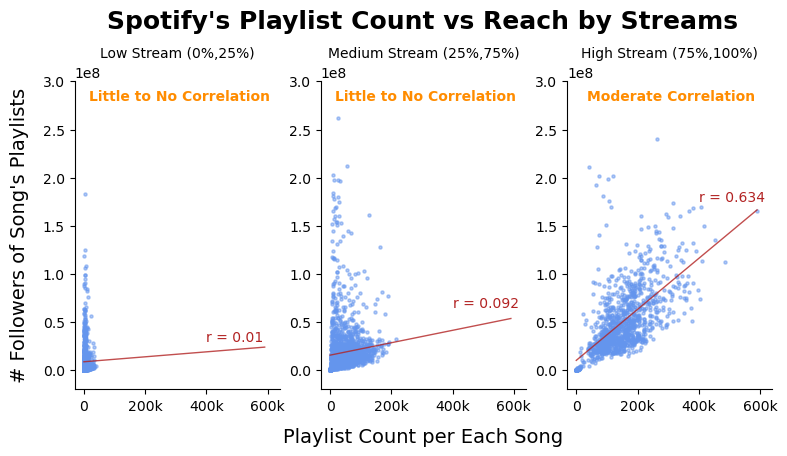

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(9,4))

# Set equal size axes for all 3 plots
for i in range(len(axes)): 
    axes[i].set_xlim(-30000, 640000)
    axes[i].set_ylim(-.2e8, 3.e8)

# Scatter plots and regression lines
axes[0].scatter(x1,y1,c=colors['blue'], s=5, alpha=0.5)
axes[1].scatter(x2,y2,c=colors['blue'], s=5, alpha=0.5)
axes[2].scatter(x3,y3,c=colors['blue'], s=5, alpha=0.5)
axes[0].plot(x1_lin, y1_lin, c=colors['red'], lw=1, alpha=0.8)
axes[1].plot(x2_lin, y2_lin, c=colors['red'], lw=1, alpha=0.8)
axes[2].plot(x3_lin, y3_lin, c=colors['red'], lw=1, alpha=0.8)

# Annotate the linear regressions
axes[0].annotate(f'r = {r1.round(3)}',(4e5,.3e8),c=colors['red'],size=10) 
axes[1].annotate(f'r = {r2.round(3)}',(4e5,0.65e8),c=colors['red'],size=10) 
axes[2].annotate(f'r = {r3.round(3)}',(4e5,1.75e8),c=colors['red'],size=10) 
axes[0].annotate("Little to No Correlation",(.165e5,2.8e8), c=colors['orange'], size=10, weight='bold')
axes[1].annotate("Little to No Correlation",(.165e5,2.8e8), c=colors['orange'], size=10, weight='bold')
axes[2].annotate("Moderate Correlation",(.35e5,2.8e8), c=colors['orange'], size=10, weight='bold')
# Removed codes that annotate the linear regression equation (not much purpose, graph too noisy)
# \ny = {int(a1.round())}*x + {b1:.2e}' 

# Show the titles
axes[1].text(-7.3e5,3.55e8,"Spotify's Playlist Count vs Reach by Streams",weight='bold',size=18)
axes[0].set_title("Low Stream (0%,25%)", pad=17, size=10)
axes[1].set_title("Medium Stream (25%,75%)", pad=17, size=10)
axes[2].set_title("High Stream (75%,100%)", pad=17, size=10)
axes[1].set_xlabel("Playlist Count per Each Song", labelpad=10, size=14)
axes[0].set_ylabel("# Followers of Song's Playlists", labelpad=10, size=14)

# X-tick labels
axes[0].set_xticks([0, 200000, 400000, 600000])
axes[0].set_xticklabels(['0','200k', '400k', '600k'])
axes[1].set_xticks([0, 200000, 400000, 600000])
axes[1].set_xticklabels(['0','200k', '400k', '600k'])
axes[2].set_xticks([0, 200000, 400000, 600000])
axes[2].set_xticklabels(['0','200k', '400k', '600k'])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.show()

In [156]:
dfs['Spotify Streams'].describe()

count    4.465000e+03
mean     4.436544e+08
std      5.304297e+08
min      1.071000e+03
25%      7.060162e+07
50%      2.396246e+08
75%      6.238759e+08
max      4.281469e+09
Name: Spotify Streams, dtype: float64